In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Import Libraries and Dataset**

In [ ]:
df = pd.read_csv('/Assignment 1.csv', encoding='cp949')

In [ ]:
df.head()

,id,meta_score,rating,release_year,summary,title,user_score
0,549123,94,TV-14,1989,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,2000,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,1970,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,1943,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,2015,"Growing up can be a bumpy road, and it_ no exc...",Inside Out,8.7


In [ ]:
df.tail(3)

,id,meta_score,rating,release_year,summary,title,user_score
15322,522425,1,PG-13,1996,Five brave scientists are forced to face life ...,Bio-Dome,7.5
15323,517421,1,Not Rated,2005,Quite definitely one of the most brutal displa...,Chaos,2.5
15324,549063,1,PG-13,2018,Not since 1860 have the Democrats so fanatical...,Death of a Nation,4.3


**Data Preprocessing**

In [ ]:
# ‘user_score’열에서 ‘tbd’을 포함한 행과 결측값을 포함한 행은 모두 제거하여라.

# series or dataframe에서 누락된 값 or NAN(숫자가 아닌)을 NA로 채우는 pandas의 함수
df['user_score'] = df['user_score'].fillna('NA')

# user_score column을 string type으로 convert (숫자와 문자 등 혼합)
df['user_score'] = df['user_score'].astype(str)

# Remove rows with 'tbd' or '\d+-\d+'(정규식 패턴 '\d+-\d+'는 더 큰 문자열 내에서 텍스트의 특정 패턴을 일치시키는 데 사용할 수 있는 문자열)
df = df[~df['user_score'].str.contains('tbd')]
df = df[~df['user_score'].str.contains('\d+-\d+')]

In [ ]:
print(df)

           id  meta_score     rating release_year  \
0      549123       8.648      TV-14         1989   
1      522228       8.648      PG-13         2000   
2      550614       8.648          G         1970   
3      549303       8.648      TV-PG         1943   
4      539956       8.648         PG         2015   
...       ...         ...        ...          ...   
15320  550890       0.092         PG         1987   
15321  544030       0.092  Not Rated         2015   
15322  522425       0.092      PG-13         1996   
15323  517421       0.092  Not Rated         2005   
15324  549063       0.092      PG-13         2018   

                                                 summary  \
0      A young boy and his little sister struggle to ...   
1      In 19th century China, a magical sword given b...   
2      In a French forest in 1798, a child is found w...   
3      A young woman discovers her visiting uncle may...   
4      Growing up can be a bumpy road, and it_ no exc...   
...

In [ ]:
# ‘meta_score’을 ‘user_score’의 기준에 따라 10점 기준으로 표준화 시킨 다음, 두 열의 값을 평균내어 ‘average_score’라는 새로운 열을 추가하고 ‘data_2’로 저장하여라 . (데이터 형식은 float로 통일 시켜준다.)

# convert 'meta_score' column to float (data구성 및 시각화를 위해 숫자 데이터를 floating)
df['meta_score'] = df['meta_score'].astype(float)

# convert 'user_score' column to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# standardize(두 열을 정규화) 'meta_score' to 10 points according to 'user_score' criteria
df['meta_score'] = (df['meta_score'] / df['meta_score'].max()) * (df['user_score'].max())

# calculate the average of 'user_score' and 'meta_score'
df['average_score'] = (df['user_score'] + df['meta_score']) / 2

# save the updated DataFrame to a new CSV file
df.to_csv('data_2.csv', index=False)

**Pivoting Features**

In [ ]:
# ‘release_year’(개봉년도) 별로 ‘average_score’이 가장 높은 영화의 제목을 내림차순(2022년, 2021년, 2020년..)으로 출력하여라.

# group movies by 'release_year', then sort by 'average_score' in descending order and get the first row for each year
best_movies = df.groupby('release_year').apply(lambda x: x.sort_values('average_score', ascending=False).iloc[0])

# select only the columns we need
best_movies = best_movies[['title', 'release_year', 'average_score']]

# reset the index
best_movies = best_movies.reset_index(drop=True)

# sort by 'release_year' in descending order
best_movies = best_movies.sort_values('release_year', ascending=False)

# print the result
print(best_movies)

                             title release_year  average_score
97                   Shin Ultraman         2023          7.910
96                        Aftersun         2022          8.320
95                Quo Vadis, Aida?         2021          8.462
94                     Wolfwalkers         2020          8.352
93                        Parasite         2019          8.766
..                             ...          ...            ...
4   All Quiet on the Western Front         1930          8.486
3                       The Circus         1929          8.240
2                  The Jazz Singer         1927          6.536
1              Battleship Potemkin         1926          8.712
0                      Intolerance         1916          8.254

[98 rows x 3 columns]


**Visualizing Data**

In [ ]:
# ‘rating’별 ‘average_score’의 평균을 구하고 변수 ‘rate_average’에 저장하여라.

rate_average = df.groupby('rating')['average_score'].mean()

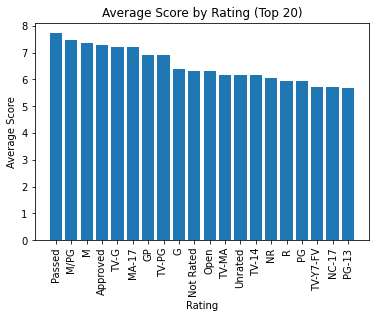

In [ ]:
# 위의 ‘rate_average’를 시각화 하여라. 

# sort the data by mean score and get the top 20 values
rate_top20 = rate_average.sort_values(ascending=False)[:20]

# create a bar chart
fig, ax = plt.subplots()
ax.bar(rate_top20.index, rate_top20.values)

# set the chart title and axis labels
ax.set_title('Average Score by Rating (Top 20)')
ax.set_xlabel('Rating')
ax.set_ylabel('Average Score')

# rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# show the chart
plt.show()

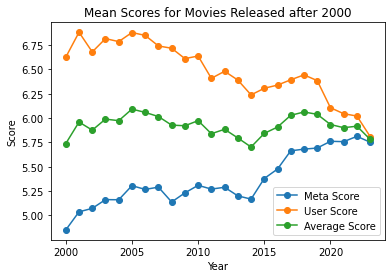

In [ ]:
#  ‘data_2’를 이용하여 2000년 이후에 개봉 된 영화들의 각 연도별 평균 ‘meta_score’과 ‘user_score’, ‘average_score’의 변화를 각각 꺾은선 그래프로 나타내어라. 

# load the data
data_2 = pd.read_csv('data_2.csv')

# filter the data to include only movies released after 2000
data_2 = data_2[data_2['release_year'] >= 2000]

# calculate the mean scores for each year
yearly_mean = data_2.groupby('release_year')[['meta_score', 'user_score', 'average_score']].mean()

# create a line chart for each score type with dots
fig, ax = plt.subplots()
ax.plot(yearly_mean.index, yearly_mean['meta_score'], label='Meta Score', marker='o')
ax.plot(yearly_mean.index, yearly_mean['user_score'], label='User Score', marker='o')
ax.plot(yearly_mean.index, yearly_mean['average_score'], label='Average Score', marker='o')

# set the chart title and axis labels
ax.set_title('Mean Scores for Movies Released after 2000')
ax.set_xlabel('Year')
ax.set_ylabel('Score')

# show the legend
ax.legend()

# show the chart
plt.show()

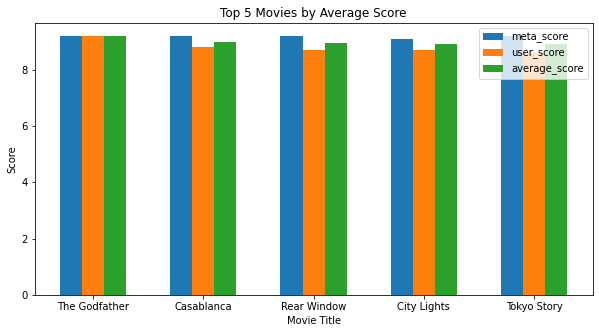

In [ ]:
# ‘data_2’를 이용하여 ‘average_score’ 상위 5개 영화를 골라내고, 해당 영화들의 ‘meta_score’, ‘user_score’, ‘average_score’ 3개의 열을 차례대로 나타낸 막대 그래프를 그려라. 

# pick out the top 5 movies by 'average_score'
top5 = data_2.sort_values('average_score', ascending=False).head(5)

# create a bar plot for each movie's 'meta_score', 'user_score', and 'average_score'
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.2
x_pos = np.arange(len(top5))

ax.bar(x_pos, top5['meta_score'], bar_width, align='center', label='meta_score')
ax.bar(x_pos + bar_width, top5['user_score'], bar_width, align='center', label='user_score')
ax.bar(x_pos + 2 * bar_width, top5['average_score'], bar_width, align='center', label='average_score')

# set the x-axis ticks and labels
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(top5['title'], rotation=90)

# Set the x-axis tick labels to be horizontal
ax.set_xticklabels(top_5['title'], rotation=0)

# set the axis labels and title
ax.set_xlabel('Movie Title')
ax.set_ylabel('Score')
ax.set_title('Top 5 Movies by Average Score')

# add a legend
ax.legend()

# show the plot
plt.show()